# Stroop Project

## Question 1: What is our independent variable? What is our dependent variable? <br>

In the Stroop test, the independent variable is the structure of the list that is presented to the particpants od the experiment. So, we have two groups for the independent variable depending on wether the font name and colour were similar or different. <br>
The dependent variable is the time between the stimulus and the response. Here it is the time it takes to solve the task in relation to the presented list of words.

## Question 2: Specify the null and alternative hypotheses based on what you think the researchers might be interested in <br>

used symbols: <br>
$H_0$: null hypthesis <br>
$H_1$: alternative hypothesis <br> 
$\mu_{C}$: poulation mean for congruent dataset <br>
$\mu_{I}$: poulation mean for incongruent dataset <br><br>

The point for starting the exmaination is that there is no significant difference in population means of response time under incongruent and congruent conditions. So we difine our null hypothesis as follows: <br>
$$H_0: \mu_{C} - \mu_{I} = 0$$

I would expect, that the population mean of the response time under incongruent condition will be significantly larger than the response time under congruent condition. So we define our alternative hypothesis as a one-tailed test as follows: <br>
$$H_1: \mu_{C} - \mu_{I} < 0 $$

In [37]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

In [38]:
df = pd.read_csv('stroopdata.csv')
df.head()

,Congruent,Incongruent
0,12.079,19.278
1,16.791,18.741
2,9.564,21.214
3,8.630,15.687
4,14.669,22.803


As we can see above our sample of the population is fairly small. The **bootstrapping method** creates bigger samples out of our existing data and can even do this in multiple repetitions to allow significance testing. So, I decided to take this path for **hypothesis testing**. This method also doesn't require us to make any asumptions regarding the distribution of our data.

## Question 3: Report some descriptive statistics regarding this dataset. Include at least one measure of central tendency and at least one measure of variability.

In [39]:
mean_congruent = df.Congruent.mean()
std_congruent = df.Congruent.std()

mean_incongruent = df.Incongruent.mean()
std_incongruent = df.Incongruent.std()

print('descriptive statistics for congruent data: \n mean: ', mean_congruent, 'standard deveation: ', std_congruent)
print('descriptive statistics for incongruent data: \n mean: ', mean_incongruent, 'standard deveation: ', std_incongruent)

descriptive statistics for congruent data: 
 mean:  14.051125000000004 standard deveation:  3.559357957645195
descriptive statistics for incongruent data: 
 mean:  22.01591666666667 standard deveation:  4.797057122469138


In [40]:
# compute the difference in means of both data sets

obs_diff = mean_congruent - mean_incongruent
print(obs_diff)

-7.964791666666665


We can see that the difference in means is smaller than 0. In the upcoming examination, we will see if this difference is statistically significant.

## Question 4: Provide one or two visualizations that show the distribution of the sample data. Write one or two sentences noting what you observe about the plot or plots.

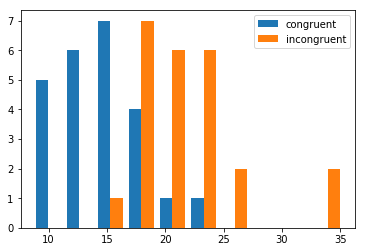

In [41]:
plt.hist(x=[df.Congruent, df.Incongruent], label=['congruent', 'incongruent'])
plt.legend();

The above visualization creates the impression, that there is a significant difference in the times it takes to complete the test for the two different groups. 

## Question 5: Now, perform the statistical test and report your results. What is your confidence level or Type I error associated with your test? What is your conclusion regarding the hypotheses you set up? Did the results match up with your expectations?

In [42]:
# create sampling distribution of difference in average time it takes to complete the test

diffs = []
for _ in range(10000):
    sample = df.sample(df.shape[0], replace=True)
    congruent_mean = sample.Congruent.mean()
    incongruent_mean = sample.Incongruent.mean()
    sample_diff = congruent_mean - incongruent_mean
    diffs.append(sample_diff)
    
# convert to numpy array
diffs = np.array(diffs)

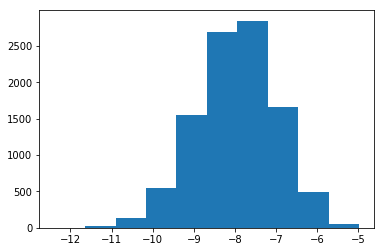

In [43]:
# plot sampling distribution
plt.hist(diffs);

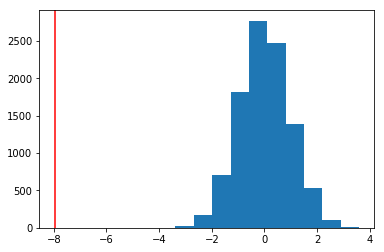

In [44]:
# simulate distribution under the null hypothesis
null_vals = np.random.normal(0, diffs.std(), 10000)

# plot null distribution
plt.hist(null_vals)

# plot line for observed statistic
plt.axvline(x=obs_diff, color='red');

In [45]:
# compute p value
(null_vals < obs_diff).mean()

0.0

**Conclusion:**

We can notice that our differences in means simulated from the null hypothesis are all greater than our observed difference in means. This results in a p-value of 0. With a Type I error of 0.05, we reject the null hypothesis in favor of our alternative. <br>
This also correlates with our assumption at the beginning of our examination, that it takes more time on average to complete the test with incongruent data.

## Question 6: What do you think is responsible for the effects observed? Can you think of an alternative or similar task that would result in a similar effect?

The reason it took the participants of the test longer to solve the problems of the incongruent dataset, is that our brain is very quick to propose answers to questions that seem familiar to us. We can easily read the words that are written down and we are also quick the recognize the color of the written word when they are aligned with the expected input for our mind, that is formed from years of experience. So we can rush through the list with congruent data. <br><br>
Now that we receive mixed signals with the incongruent dataset our brain starts to struggle. The intuitive system is not able to align it's hard trained knowledge and has to put in extra work in form of attention to solve the given task. This results in longer times and more errors to pass the test with incongruent data. <br><br>
An experiment with similar results in the outcome would be, to present participants to list of words, that they had to read out loud and state the word and the position it is printed in the sheet of paper. The list for congruent data would list the words 'right' or 'left'. Each word would be aligned on the corresponding side of the sheet, meaning the word 'right' is bound to the right side of the sheet and vice versa. The incongruent dataset would mix this up, meaning the word 'right' is possible to be bound to the left side of the sheet. 

## Resources:

http://www.dylanjorgensen.com/blog/t-testing-the-stroop-effect <br>
https://de.wikipedia.org/wiki/Stroop-Effekt <br>
german version of: Thinking, Fast and Slow by Daniel Kahneman